## Continuing my use of PyPortfolioOpt 
In this project I am going to continue my use of PyPortfolioOpt to optimize a portfolio. 
The plan is that I am going to load data of several stocks from the beginning of 2017 to the end of 2019.
All of these stocks will be in the original portfolio.
I will then figure out the optimized portfolio and compare its performance to the current date (which for me is Feb 13, 2021) with the original and see which portfolio did better and by how much.
Should be fun trying to code this and learn more about using python and python packages for finance. 

In [181]:
#Import our necessary libraries 
from pandas_datareader import data as web 
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [182]:
#Lets get the stock tickers in our original portfolio first 
stocks =['FB','AAPL','TSLA','JNJ','JPM','SQ','CRSP','NFLX','SHOP','F','T','DIS','WMT','BA','V']

In [183]:
#Assign weights to the stocks we have in our portfolio. I'm just doing this arbitrarily
weights =np.array([0.1,0.1,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.1,])

In [184]:
#Get our portfolio start date 
startdate= '2017-01-01'

In [185]:
#Get the end date we want for our data
enddate= '2019-12-31'

In [186]:
#Make a dataframe to store our closing data from our stocks of interest 
df=pd.DataFrame()

#Store the adjusted close price of each stock in the dataframe 
for stock in stocks:
    df[stock]=web.DataReader(stock,data_source='yahoo', start=startdate, end=enddate)['Adj Close']
df

,FB,AAPL,TSLA,JNJ,JPM,SQ,CRSP,NFLX,SHOP,F,T,DIS,WMT,BA,V
Date,,,,,,,,,,,,,,,
2017-01-03,116.860001,27.459938,43.397999,104.081535,77.458603,13.810000,22.500000,127.489998,42.820000,10.255995,33.468929,101.584358,63.028099,145.533676,77.321976
2017-01-04,118.690002,27.429203,45.397999,103.910828,77.601486,14.250000,23.549999,129.410004,44.139999,10.728472,33.274429,102.886719,63.395302,147.063477,77.954185
2017-01-05,120.669998,27.568691,45.349998,104.998009,76.887154,14.560000,22.959999,131.809998,47.680000,10.402627,33.181072,102.829262,63.532982,147.146927,78.868431
2017-01-06,123.410004,27.876030,45.801998,104.494850,76.896103,15.000000,22.540001,131.070007,46.900002,10.394480,32.519962,104.361458,62.660908,147.508514,79.957748
2017-01-09,124.900002,28.131361,46.256001,104.476868,76.949669,15.060000,22.889999,130.949997,47.180000,10.288578,32.110714,103.767731,63.074001,146.785309,79.510353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,205.119995,70.353882,85.050003,142.067749,131.809601,63.959999,67.230003,333.200012,399.390015,9.311640,35.831345,145.289993,117.547737,331.030457,186.133530
2019-12-26,207.789993,71.749733,86.188004,141.970413,133.208389,64.029999,66.750000,332.630005,408.750000,9.291973,36.015293,145.699997,117.557564,327.968689,187.711380
2019-12-27,208.100006,71.722488,86.075996,141.892517,133.304199,63.799999,66.010002,329.089996,408.000000,9.203478,36.088863,145.750000,117.626419,328.187408,187.939590


Text(0.5, 1.0, 'Ajusted Close Price History of Portfolio')

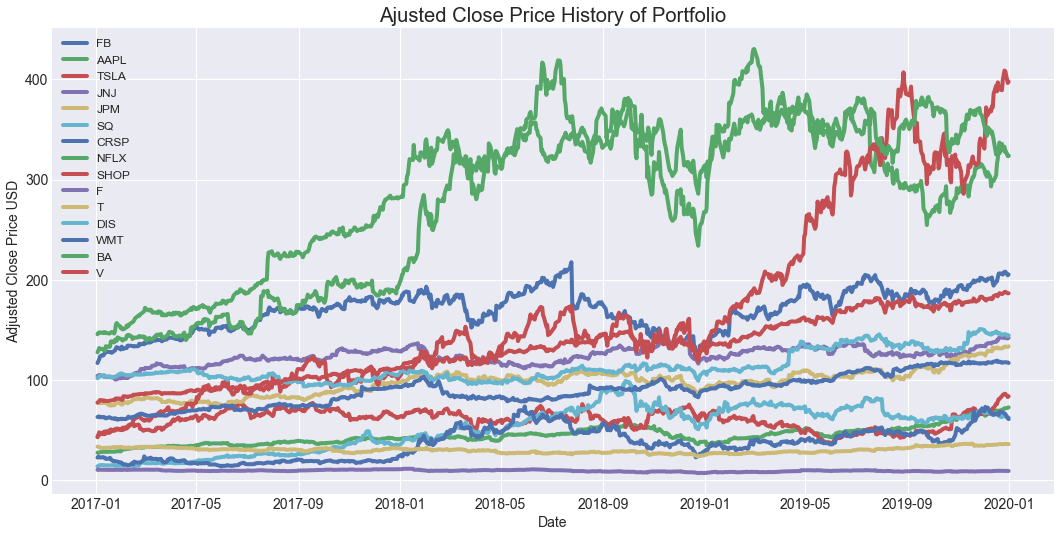

In [187]:
#Now lets plot the closing price over the years 

plt.figure(figsize=(16,8))
for col in df.columns.values:
    plt.plot(df[col], label=col)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price USD',fontsize=14)
plt.legend(df.columns.values, loc='upper left', fontsize=12)
plt.title('Ajusted Close Price History of Portfolio')

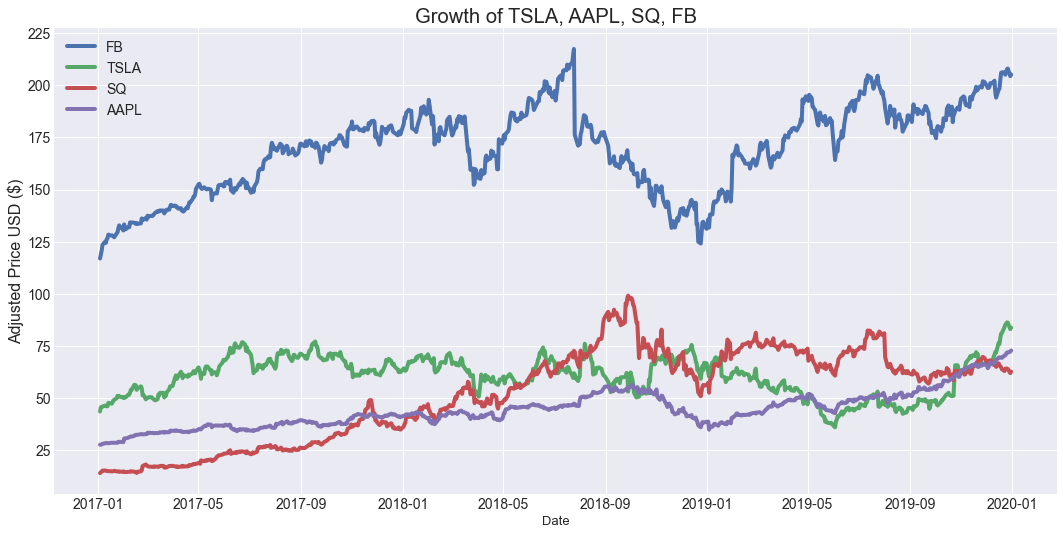

In [317]:
#Theres some stocks that we are specifically interested in and those are TSLA, SQ, FB, and AAPL
#Plot tickers of interest 
df_tickers_of_int=df[['FB','TSLA','SQ','AAPL']]
df_tickers_of_int
plt.figure(figsize=(16,8))
for col in df_tickers_of_int.columns.values:
    plt.plot(df[col], label=col)
plt.title('Growth of TSLA, AAPL, SQ, FB')
plt.xlabel('Date',fontsize=13)
plt.ylabel('Adjusted Price USD ($)',fontsize=16)
plt.legend(loc='upper left')

In [189]:
#Lets see the returns from each stock over the time period fo interest 
returns=df.pct_change()
returns

,FB,AAPL,TSLA,JNJ,JPM,SQ,CRSP,NFLX,SHOP,F,T,DIS,WMT,BA,V
Date,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.015660,-0.001119,0.046085,-0.001640,0.001845,0.031861,0.046667,0.015060,0.030827,0.046068,-0.005811,0.012820,0.005826,0.010512,0.008176
2017-01-05,0.016682,0.005085,-0.001057,0.010463,-0.009205,0.021754,-0.025053,0.018546,0.080199,-0.030372,-0.002806,-0.000558,0.002172,0.000567,0.011728
2017-01-06,0.022707,0.011148,0.009967,-0.004792,0.000116,0.030220,-0.018293,-0.005614,-0.016359,-0.000783,-0.019924,0.014900,-0.013726,0.002457,0.013812
2017-01-09,0.012074,0.009160,0.009912,-0.000172,0.000697,0.004000,0.015528,-0.000916,0.005970,-0.010188,-0.012585,-0.005689,0.006593,-0.004903,-0.005595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.005141,0.000951,0.014384,-0.003483,0.002770,0.018471,-0.009576,0.000300,0.026367,0.003178,-0.002816,0.004216,0.004033,-0.013480,0.002619
2019-12-26,0.013017,0.019840,0.013380,-0.000685,0.010612,0.001094,-0.007140,-0.001711,0.023436,-0.002112,0.005134,0.002822,0.000084,-0.009249,0.008477
2019-12-27,0.001492,-0.000380,-0.001300,-0.000549,0.000719,-0.003592,-0.011086,-0.010642,-0.001835,-0.009524,0.002043,0.000343,0.000586,0.000667,0.001216


Text(0.5, 1.0, 'Daily Return Percentage for FB and AAPL')

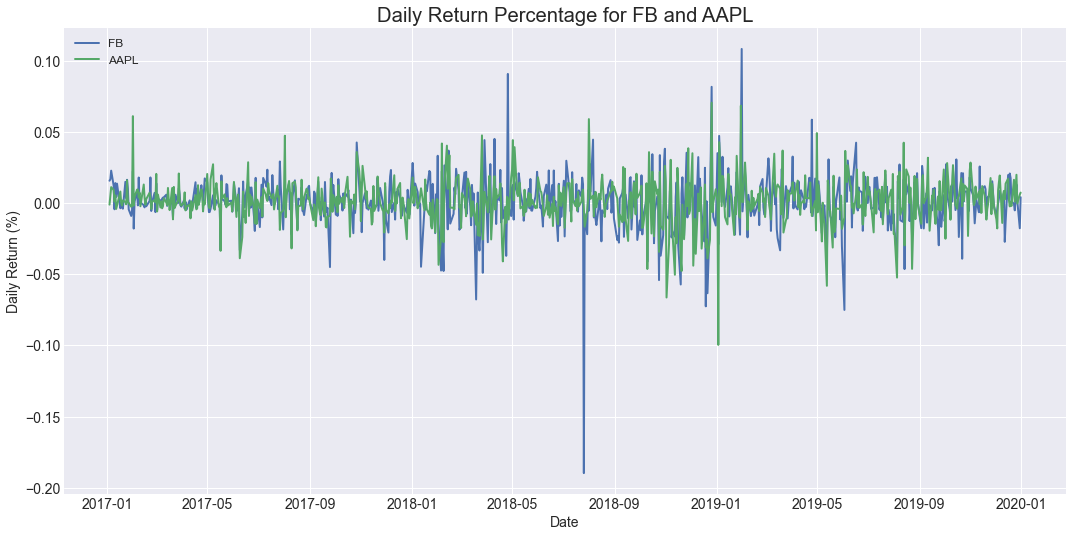

In [190]:
#Now lets plot the returns over the years for two specific tech stocks that we are interested in, FB and AAPL

plt.figure(figsize=(16,8))
plt.plot(returns[returns.columns[0]], label=returns.columns[0],linewidth=2)
plt.plot(returns[returns.columns[1]], label=returns.columns[1],linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return (%)',fontsize=14)
plt.legend(df.columns.values, loc='upper left', fontsize=12)
plt.title('Daily Return Percentage for FB and AAPL')

In [191]:
#Our next step is to calcualted the annualized covariance matrix as this will help us to create an optimized portfolio
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,FB,AAPL,TSLA,JNJ,JPM,SQ,CRSP,NFLX,SHOP,F,T,DIS,WMT,BA,V
FB,0.084046,0.033455,0.036294,0.009316,0.017036,0.058344,0.052959,0.049887,0.054587,0.022495,0.005577,0.014465,0.007381,0.022369,0.029217
AAPL,0.033455,0.060890,0.037640,0.010904,0.020491,0.055625,0.044866,0.041500,0.046605,0.015468,0.009772,0.016890,0.010379,0.025443,0.028383
TSLA,0.036294,0.037640,0.236707,0.009661,0.019707,0.056091,0.045612,0.054830,0.057220,0.020768,0.007112,0.015805,0.013011,0.028290,0.030029
JNJ,0.009316,0.010904,0.009661,0.029370,0.010098,0.012949,0.009098,0.015711,0.015782,0.008042,0.009569,0.008252,0.008812,0.013250,0.010804
JPM,0.017036,0.020491,0.019707,0.010098,0.036829,0.027105,0.026640,0.023000,0.019280,0.021525,0.012993,0.015993,0.009389,0.021109,0.017158
SQ,0.058344,0.055625,0.056091,0.012949,0.027105,0.222000,0.101978,0.085744,0.106169,0.020407,0.009622,0.022281,0.015604,0.043726,0.054629
CRSP,0.052959,0.044866,0.045612,0.009098,0.026640,0.101978,0.460079,0.083790,0.087241,0.027242,0.009411,0.023289,0.014055,0.037689,0.041073
NFLX,0.049887,0.041500,0.054830,0.015711,0.023000,0.085744,0.083790,0.137440,0.078617,0.019322,0.009822,0.019598,0.011365,0.033927,0.039603
SHOP,0.054587,0.046605,0.057220,0.015782,0.019280,0.106169,0.087241,0.078617,0.222529,0.011111,0.006242,0.018639,0.010277,0.030196,0.052394
F,0.022495,0.015468,0.020768,0.008042,0.021525,0.020407,0.027242,0.019322,0.011111,0.060201,0.014723,0.013962,0.007323,0.014321,0.013572


In [192]:
#Get the portfolio variance 
portfolio_var = np.dot(weights.T,np.dot(cov_matrix_annual, weights))
portfolio_var

0.039010436147773046

In [193]:
#Now we can calcualte the portfolio's volatility/ risk whcih is the sqrt of the variance
portfolio_volat=np.sqrt(portfolio_var)
portfolio_volat

0.19751059755813877

In [194]:
#Lastly we need te portfolio's annual return 
portfolio_annual_return=np.sum(returns.mean()*weights*252)
portfolio_annual_return

0.34977864185300545

In [195]:
#We can show these values cleanly 
percent_var = str(round(portfolio_var, 2)*100)+'%'
percent_volat= str(round(portfolio_volat, 2)*100)+'%'
percent_ann_ret= str(round(portfolio_annual_return, 2)*100)+'%'
print('Annual return: '+ percent_ann_ret)
print('Annual volatility/risk :'+percent_volat)
print('Annual variance :'+percent_var)

Annual return: 35.0%
Annual volatility/risk :20.0%
Annual variance :4.0%


In [196]:
#Now we can optimize our portfolio to see what stocks we should have in our portfolio and at what weights
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models 
from pypfopt import expected_returns
from pypfopt import plotting
import seaborn as sns

<AxesSubplot:>

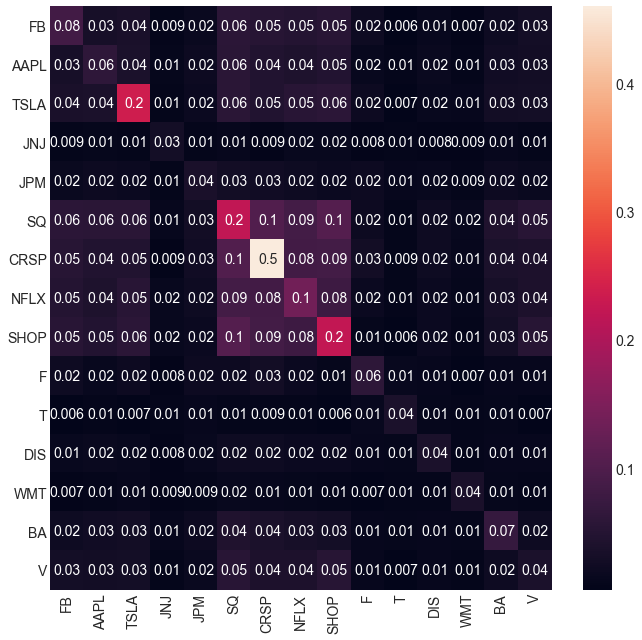

In [197]:
#First we can look at the risk matrix of our portfolio
covariance_og=risk_models.risk_matrix(df)
plt.figure(figsize=(10,10))
risk=sns.heatmap(covariance_og, annot = True, fmt='.1g')
risk

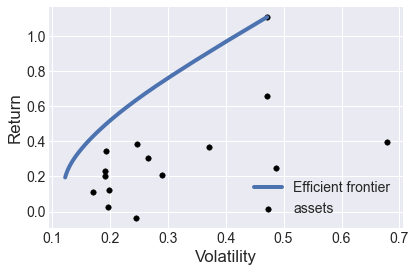

In [198]:
#now we can calculate the expected returns and the annualized sample covariance matrix of asset returns 
mu = expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

#With this info we can create our efficient frontier which will help us choose whihc portfolio is best 
ef=EfficientFrontier(mu,S)
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()
#now that we have our efficient frontier it will allow us to understand what we want in our optimized portfolio

In [199]:
#Our next step is to optimize for the Max Sharpe Ratio 
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


OrderedDict([('FB', 0.0), ('AAPL', 0.15277), ('TSLA', 0.0), ('JNJ', 0.0), ('JPM', 0.02568), ('SQ', 0.0), ('CRSP', 0.0), ('NFLX', 0.0), ('SHOP', 0.39241), ('F', 0.0), ('T', 0.0), ('DIS', 0.0), ('WMT', 0.33854), ('BA', 0.09059), ('V', 0.0)])
Expected annual return: 60.4%
Annual volatility: 23.3%
Sharpe Ratio: 2.51


(0.604300813035768, 0.2330695394146428, 2.506980596877855)

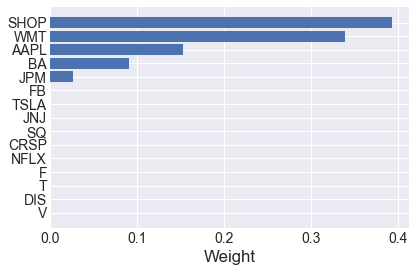

<AxesSubplot:xlabel='Weight'>

In [228]:
#To visualize this we can plot the weighting for our optimal portfolio
plotting.plot_weights(cleaned_weights)

In [227]:
#Another important thing to do is to see how many of each security we can fit into our portfolio based on 
#the monetary value fo our portfolio 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices= get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(cleaned_weights,latest_prices,total_portfolio_value=50000)

allocation, leftover=da.lp_portfolio()
print('Discrete Allocation :', allocation )
print('Leftover Amount : ${:.2f}'.format(leftover))

Discrete Allocation : {'AAPL': 105, 'JPM': 10, 'SHOP': 49, 'F': 7, 'WMT': 145, 'BA': 14}
Leftover Amount : $5.59


In [229]:
#Our last piece of analysis will be a cool one. If you remember we used data from the 
#beginning of 2017 to the end of 2019. Now we will compare the performance of our original 
#portfolio to our optimized portfolio by analysing their returns from the beginning of 2020
#to now

og_assets= ['FB','AAPL','TSLA','JNJ','JPM','SQ','CRSP','NFLX','SHOP','F','T','DIS','WMT','BA','V']
optimized_assets = ['AAPL','JPM','SHOP','WMT','BA']

In [230]:
#We also need the weights of each stock in our portfolio
og_weights= np.array([0.1,0.1,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.05,0.05,0.05,0.05,0.05,0.1,])
optimized_weights=np.array([0.15277,0.02568,0.39241,0.33854,0.09059])

In [231]:
#And we need the date range for each stock
startdate1='2020-01-01'
enddate1=datetime.today().strftime('%Y-%m-%d')

In [232]:
#Lets create a datframe with each stock in it and their prices
df_og=pd.DataFrame()
df_opt=pd.DataFrame()

for asset in og_assets:
    df_og[asset]=web.DataReader(asset,data_source='yahoo', start=startdate1, end=enddate1)['Adj Close']

for asset in optimized_assets:
    df_opt[asset]=web.DataReader(asset,data_source='yahoo', start=startdate1, end=enddate1)['Adj Close']

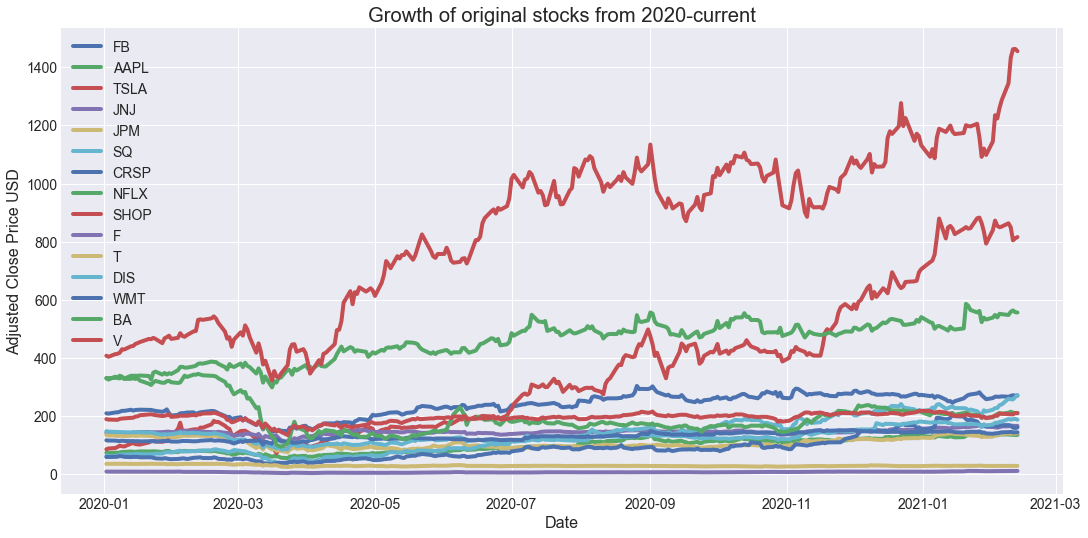

In [233]:
#Next we can plot the prices of the stocks in the original and optimal protfolio for our time period of interest
#original portfolio 
plt.figure(figsize=(16,8))
plt.title('Growth of original stocks from 2020-current')
for stock in df_og.columns.values:
    plt.plot(df_og[stock], label=stock)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Adjusted Close Price USD', fontsize=16)
plt.legend(df_og.columns.values)

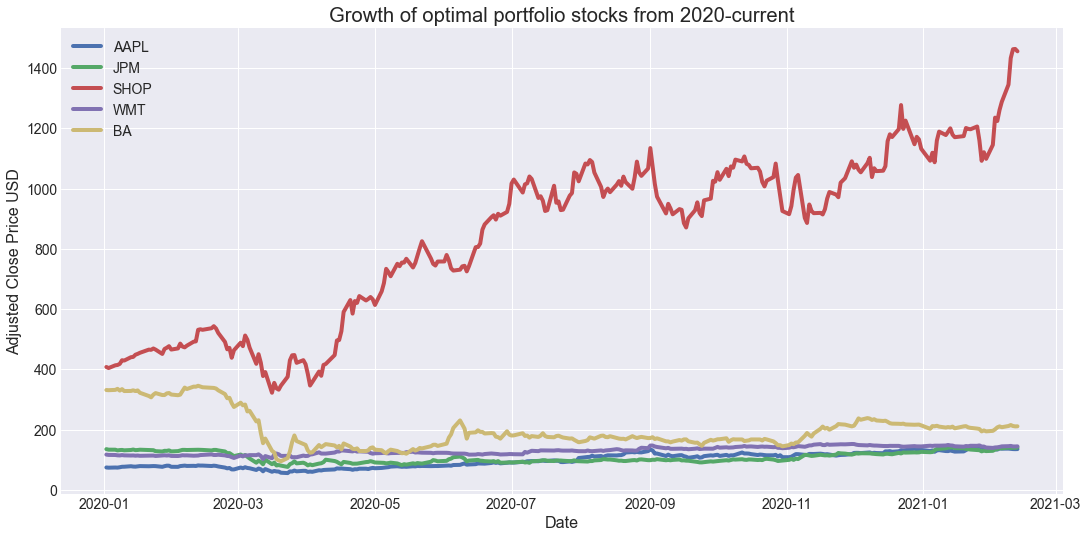

In [234]:
#And then plot the prices of the stocks in the optimal protfolio
plt.figure(figsize=(16,8))
plt.title('Growth of optimal portfolio stocks from 2020-current')
for stock in df_opt.columns.values:
    plt.plot(df_opt[stock], label=stock)
    
plt.xlabel('Date', fontsize=16)
plt.ylabel('Adjusted Close Price USD', fontsize=16)
plt.legend(df_opt.columns.values)

In [270]:
#We've visualized the growth but lets see the return from both portfolios with their stocks and respective weights 
returns_og=df_og.pct_change()
returns_opt=df_opt.pct_change()
returns_og

,FB,AAPL,TSLA,JNJ,JPM,SQ,CRSP,NFLX,SHOP,F,T,DIS,WMT,BA,V
Date,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.005291,-0.009722,0.029633,-0.011578,-0.013197,-0.013003,0.002023,-0.011855,-0.008631,-0.022293,0.005147,-0.011471,-0.008828,-0.001680,-0.007953
2020-01-06,0.018834,0.007968,0.019255,-0.001247,-0.000795,-0.006825,0.008580,0.030469,0.022360,-0.005429,0.001024,-0.005802,-0.002036,0.002945,-0.002162
2020-01-07,0.002164,-0.004703,0.038801,0.006107,-0.017001,0.032284,0.006672,-0.015127,0.002831,0.009825,0.003836,0.000343,-0.009265,0.010607,-0.002643
2020-01-08,0.010138,0.016086,0.049205,-0.000138,0.007801,0.046602,0.036123,0.025729,0.008685,0.000000,0.003057,-0.002059,-0.003432,-0.017523,0.017118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,-0.005670,0.001097,0.013130,0.002858,0.015654,0.081496,0.002488,-0.005211,0.044527,0.004344,-0.005531,0.048797,0.004641,0.019333,-0.009005
2021-02-09,0.010766,-0.006574,-0.016168,0.008186,-0.003996,-0.007116,-0.009927,0.020350,0.065349,0.032007,-0.005214,-0.009421,0.005516,0.014956,-0.001788
2021-02-10,0.008981,-0.004558,-0.052551,0.003248,0.000573,-0.002441,-0.043868,0.008085,0.020538,-0.014250,-0.002446,0.007545,-0.011657,-0.014875,-0.000387


In [303]:
annual_return_og=np.sum(returns_og.mean()*og_weights*len(returns_og))
annual_return_opt=np.sum(returns_opt.mean()*optimized_weights*len(returns_opt))

percent_ret_og=annual_return_og*100
percent_ret_opt=annual_return_opt*100

print('Return from 2020 to now for original portfolio: {:.2f}%'.format(percent_ret_og))
print('Return from 2020 to now for optimized portfolio : {:.2f}%'.format(percent_ret_opt))

Return from 2020 to now for original portfolio: 71.97%
Return from 2020 to now for optimized portfolio : 79.48%


In [304]:
#As we can see above our optimized portfolio gave us a return of 79% compared to our original portfolio which was 71%
#Lets plot the growth of each portfolio over the days starting with the original portfolio
og_returns_daily=[]
for i in range(len(returns_og)):
    x=np.sum(returns_og.values[i]*og_weights*100)
    og_returns_daily.append(x)

og_returns_daily=np.array(og_returns_daily)
og_returns_daily=np.nan_to_num(og_returns_daily)
og_returns_cumulative=np.cumsum(og_returns_daily)
og_returns_cumulative

array([  0.        ,  -0.59137424,   0.12221616,   0.4674784 ,
         1.89519299,   2.50939256,   1.83301793,   3.0524041 ,
         3.25340338,   3.37976869,   3.70800321,   3.78155132,
         4.09844545,   4.21482837,   4.34432575,   3.5983722 ,
         1.96430676,   3.88615671,   4.28643223,   4.39120708,
         2.44618107,   4.52273416,   7.18013595,   6.12211055,
         6.45414456,   5.86396693,   7.59279363,   7.24725742,
         8.92091435,   9.39298477,   8.991765  ,   9.50820815,
        10.82973394,  10.0191239 ,   8.12697793,   4.2271821 ,
         0.69117008,   0.95522742,  -3.37635392,  -2.44682518,
         1.99091099,  -1.16442002,   2.57062563,  -0.53936424,
        -2.75452035, -11.60961293,  -6.59232862, -11.93982628,
       -22.22201175, -14.61388326, -28.23316749, -23.29013423,
       -28.10247734, -26.56999827, -29.57343128, -29.64848586,
       -18.41423649, -15.53041285, -11.17402977, -15.56584546,
       -12.84569974, -14.74510014, -20.70394436, -20.92

In [307]:
#cumulative optimized portfolio return
opt_returns_daily=[]
for i in range(len(returns_opt)):
    x=np.sum(returns_opt.values[i]*optimized_weights*100)
    opt_returns_daily.append(x)

opt_returns_daily=np.array(opt_returns_daily)
opt_returns_daily=np.nan_to_num(opt_returns_daily)
opt_returns_cumulative=np.cumsum(opt_returns_daily)
opt_returns_cumulative

array([  0.        ,  -0.83520049,   0.1196824 ,  -0.10230227,
         0.22938052,   2.18450522,   1.64388176,   2.86747932,
         2.92367633,   3.13631824,   3.82424023,   3.83366454,
         4.5000991 ,   4.51733945,   5.14051785,   4.44646687,
         3.02438931,   5.1579718 ,   5.76051693,   6.44116304,
         4.02596598,   4.18826973,   6.4249172 ,   6.57599227,
         6.72383027,   6.89827683,   7.91138979,   7.94615265,
        11.58666838,  11.99979019,  11.93503314,  12.46152017,
        12.64792117,  11.88879561,  10.51553204,   6.49500687,
         2.95086219,   3.46067255,  -1.91155994,  -1.0315876 ,
         5.67971775,   3.03883763,   7.95250218,   5.28333012,
         3.33887566,  -3.91964596,   1.29691058,  -4.95604797,
       -15.52550731,  -7.70129118, -21.2766671 , -12.87290049,
       -16.21635832, -17.88481139, -19.11198613, -15.14444455,
        -5.48347559,  -3.41083172,  -0.98157528,  -5.0637047 ,
        -2.55600511,  -4.55703702,  -9.52400968, -12.26

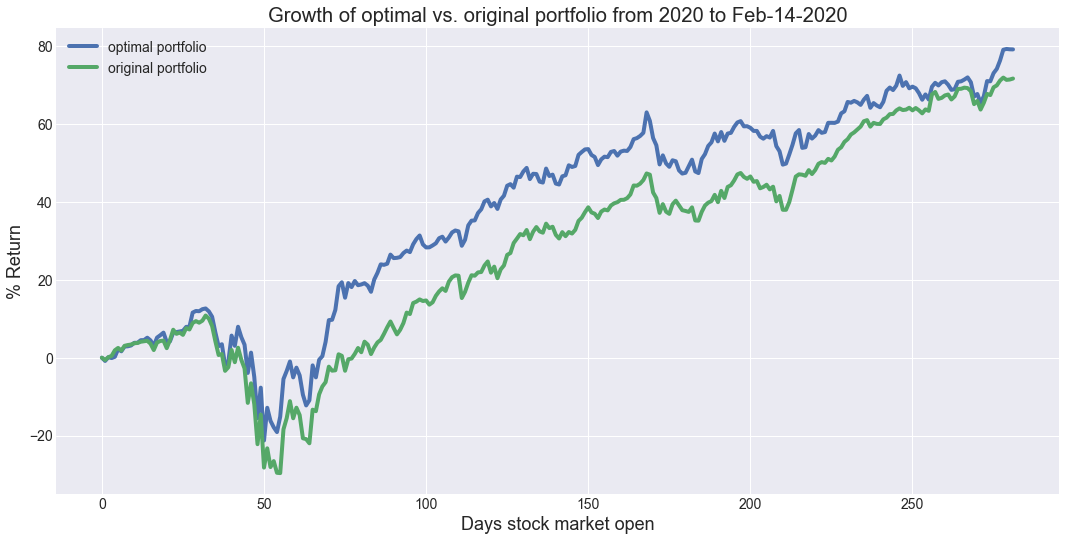

In [311]:
#Now we can plot it 
plt.figure(figsize=(16,8))
plt.plot(opt_returns_cumulative, label='optimal portfolio')
plt.plot(og_returns_cumulative, label='original portfolio')
plt.ylabel('% Return', fontsize=18)
plt.xlabel('Days stock market open', fontsize=18)
plt.title('Growth of optimal vs. original portfolio from 2020 to Feb-14-2020')
plt.legend()